# ANÁLISE EXPLORATÓRIA DE DADOS
* Transformar colunas
* Criar colunas
* Substituir valores
* Responder perguntas 
* Visualizar
## Acidentes de trânsito no Brasil

### Importando bibliotecas

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs


### Lendo arquivos

In [30]:
data_2021 = pd.read_csv("dados_trabalho/2021.csv", encoding="ISO-8859-1", sep = ";")
data_2021["year"] = 2021

In [31]:
data_2021.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,year
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116,453,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,"-24,56168114","-47,86752174",SPRF-SP,DEL05-SP,UOP01-DEL05-SP,2021
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174,937,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,5,1,1,5,"-2,508068","-60,036434",SPRF-AM,DEL01-AM,UOP01-DEL01-AM,2021
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222,"128,5",ITAPAJE,Velocidade Incompatível,Tombamento,...,0,11,2,12,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE,2021
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,1,1,1,3,"-22,6687122","-43,01862696",SPRF-RJ,DEL04-RJ,UOP02-DEL04-RJ,2021
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393,252,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,1,1,2,3,"-22,43422023","-43,77561487",SPRF-RJ,DEL05-RJ,UOP04-DEL05-RJ,2021


In [32]:
data_2021.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'year'],
      dtype='object')

In [33]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250889 entries, 0 to 250888
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      250889 non-null  float64       
 1   data_inversa            250889 non-null  object        
 2   dia_semana              250889 non-null  object        
 3   horario                 250889 non-null  object        
 4   uf                      250889 non-null  object        
 5   br                      250889 non-null  int64         
 6   km                      250889 non-null  object        
 7   municipio               250889 non-null  object        
 8   causa_acidente          250889 non-null  object        
 9   tipo_acidente           250889 non-null  object        
 10  classificacao_acidente  250885 non-null  object        
 11  fase_dia                250889 non-null  object        
 12  sentido_via             250889

In [34]:
data_2022 = pd.read_csv("dados_trabalho/2022.csv")
data_2022["year"] = 2022


In [35]:
data_2023 = pd.read_csv("dados_trabalho/2023.csv", encoding="ISO-8859-1", sep = ";")
data_2023["year"] = 2023
data_2024 = pd.read_csv("dados_trabalho/2024.csv")
data_2024["year"] = 2024

### Concatenação

In [36]:
len(data_2021), len(data_2022), len(data_2023), len(data_2024)

(64567, 64606, 67766, 53950)

In [37]:
df_total = pd.concat([data_2021, data_2022, data_2023, data_2024], ignore_index=True)

In [10]:
df_total.to_csv("dados_trabalho/df_completo.csv", index = False)

### Verificando valores nulos

In [38]:
df_total.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                          0
km                          0
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      4
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                   23
delegacia                  85
uop                       219
year                        0
dtype: int64

### Outras informações do dataset
describe etc

In [39]:
df_total.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,year
count,250889.000000,250889.000000,250889.000000,250889.000000,250889.000000,250889.000000,250889.000000,250889.000000,250889.000000,250889.000000,250889.000000
mean,487171.674055,210.154291,2.563137,0.083631,0.859133,0.278043,1.028881,0.401165,1.137176,1.985484,2022.442821
std,88135.406738,130.175294,2.116121,0.337769,1.068620,0.617826,1.649065,0.849458,1.193285,1.121350,1.091564
min,331693.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2021.000000
25%,404481.000000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2021.000000
50%,493667.000000,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2022.000000
75%,563207.000000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2023.000000
max,636019.000000,498.000000,95.000000,23.000000,61.000000,31.000000,61.000000,88.000000,62.000000,131.000000,2024.000000


### Transformando colunas
As colunas latitude e longitude, por exemplo, são representadas por strings, precisamos mudar para float

In [50]:
df_total['latitude'] = df_total['latitude'].str.replace(',', '.').astype(float)
df_total['longitude'] = df_total['longitude'].str.replace(',', '.').astype(float)
df_total['km'] = df_total['km'].str.replace(',', '.').astype(float)

In [41]:
df_total.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,year
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116,453,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,-24.561681,-47.867522,SPRF-SP,DEL05-SP,UOP01-DEL05-SP,2021
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174,937,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,5,1,1,5,-2.508068,-60.036434,SPRF-AM,DEL01-AM,UOP01-DEL01-AM,2021
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222,"128,5",ITAPAJE,Velocidade Incompatível,Tombamento,...,0,11,2,12,-3.707626,-39.623509,SPRF-CE,DEL04-CE,UOP03-DEL04-CE,2021
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,1,1,1,3,-22.668712,-43.018627,SPRF-RJ,DEL04-RJ,UOP02-DEL04-RJ,2021
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393,252,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,1,1,2,3,-22.434220,-43.775615,SPRF-RJ,DEL05-RJ,UOP04-DEL05-RJ,2021


### Criando novas colunas
Criar coluna de período do dia

In [42]:
type(df_total["horario"][1])

str

In [52]:
# 1) Converter a string para um tipo datetime (considerando apenas a hora, minuto, segundo):
df_total['horario_dt'] = pd.to_datetime(df_total['horario'], format='%H:%M:%S', errors='coerce')


In [53]:
df_total

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,veiculos,latitude,longitude,regional,delegacia,uop,year,horario_dt,hora_inteira,periodo_do_dia
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116,453.0,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,1,-24.561681,-47.867522,SPRF-SP,DEL05-SP,UOP01-DEL05-SP,2021,1900-01-01 05:30:00,5,MANHÃ
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174,937.0,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,5,-2.508068,-60.036434,SPRF-AM,DEL01-AM,UOP01-DEL01-AM,2021,1900-01-01 08:05:00,8,MANHÃ
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222,128.5,ITAPAJE,Velocidade Incompatível,Tombamento,...,12,-3.707626,-39.623509,SPRF-CE,DEL04-CE,UOP03-DEL04-CE,2021,1900-01-01 10:10:00,10,MANHÃ
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493,18.0,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,3,-22.668712,-43.018627,SPRF-RJ,DEL04-RJ,UOP02-DEL04-RJ,2021,1900-01-01 12:30:00,12,TARDE
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393,252.0,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,3,-22.434220,-43.775615,SPRF-RJ,DEL05-RJ,UOP04-DEL05-RJ,2021,1900-01-01 14:40:00,14,TARDE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250884,635554.0,2024-09-27,sexta-feira,16:15:00,BA,324,615.0,SALVADOR,Condutor deixou de manter distância do veículo...,Colisão lateral mesmo sentido,...,2,-12.872064,-38.427464,SPRF-BA,DEL01-BA,UOP01-DEL01-BA,2024,1900-01-01 16:15:00,16,TARDE
250885,635630.0,2024-09-15,domingo,20:30:00,RJ,116,108.0,GUAPIMIRIM,Condutor deixou de manter distância do veículo...,Colisão traseira,...,2,-22.535843,-42.991250,SPRF-RJ,DEL04-RJ,UOP01-DEL04-RJ,2024,1900-01-01 20:30:00,20,NOITE
250886,635699.0,2024-08-13,terça-feira,16:22:00,AP,210,3.0,MACAPA,Transitar na calçada,Colisão lateral sentido oposto,...,2,0.087234,-51.085690,SPRF-AP,DEL01-AP,UOP01-DEL01-AP,2024,1900-01-01 16:22:00,16,TARDE
250887,635887.0,2024-09-21,sábado,18:50:00,PR,277,679.0,MEDIANEIRA,Manobra de mudança de faixa,Capotamento,...,2,-25.317580,-54.156842,SPRF-PR,DEL05-PR,UOP01-DEL05-PR,2024,1900-01-01 18:50:00,18,NOITE


In [54]:

# 2) Extrair somente a hora (parte inteira):
df_total['hora_inteira'] = df_total['horario_dt'].dt.hour

In [55]:
df_total

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,veiculos,latitude,longitude,regional,delegacia,uop,year,horario_dt,hora_inteira,periodo_do_dia
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116,453.0,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,1,-24.561681,-47.867522,SPRF-SP,DEL05-SP,UOP01-DEL05-SP,2021,1900-01-01 05:30:00,5,MANHÃ
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174,937.0,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,5,-2.508068,-60.036434,SPRF-AM,DEL01-AM,UOP01-DEL01-AM,2021,1900-01-01 08:05:00,8,MANHÃ
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222,128.5,ITAPAJE,Velocidade Incompatível,Tombamento,...,12,-3.707626,-39.623509,SPRF-CE,DEL04-CE,UOP03-DEL04-CE,2021,1900-01-01 10:10:00,10,MANHÃ
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493,18.0,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,3,-22.668712,-43.018627,SPRF-RJ,DEL04-RJ,UOP02-DEL04-RJ,2021,1900-01-01 12:30:00,12,TARDE
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393,252.0,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,3,-22.434220,-43.775615,SPRF-RJ,DEL05-RJ,UOP04-DEL05-RJ,2021,1900-01-01 14:40:00,14,TARDE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250884,635554.0,2024-09-27,sexta-feira,16:15:00,BA,324,615.0,SALVADOR,Condutor deixou de manter distância do veículo...,Colisão lateral mesmo sentido,...,2,-12.872064,-38.427464,SPRF-BA,DEL01-BA,UOP01-DEL01-BA,2024,1900-01-01 16:15:00,16,TARDE
250885,635630.0,2024-09-15,domingo,20:30:00,RJ,116,108.0,GUAPIMIRIM,Condutor deixou de manter distância do veículo...,Colisão traseira,...,2,-22.535843,-42.991250,SPRF-RJ,DEL04-RJ,UOP01-DEL04-RJ,2024,1900-01-01 20:30:00,20,NOITE
250886,635699.0,2024-08-13,terça-feira,16:22:00,AP,210,3.0,MACAPA,Transitar na calçada,Colisão lateral sentido oposto,...,2,0.087234,-51.085690,SPRF-AP,DEL01-AP,UOP01-DEL01-AP,2024,1900-01-01 16:22:00,16,TARDE
250887,635887.0,2024-09-21,sábado,18:50:00,PR,277,679.0,MEDIANEIRA,Manobra de mudança de faixa,Capotamento,...,2,-25.317580,-54.156842,SPRF-PR,DEL05-PR,UOP01-DEL05-PR,2024,1900-01-01 18:50:00,18,NOITE


In [56]:
df_total["periodo_do_dia"] = df_total['hora_inteira'].apply(
   lambda x: 'MANHÃ' if 5 <= x < 12 else
             'TARDE' if 12 <= x < 18 else
             'NOITE' if 18 <= x < 24 else
             'MADRUGADA' if 0 <= x < 5 else 'DESCONHECIDO'
)

In [57]:
df_total

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,veiculos,latitude,longitude,regional,delegacia,uop,year,horario_dt,hora_inteira,periodo_do_dia
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116,453.0,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,1,-24.561681,-47.867522,SPRF-SP,DEL05-SP,UOP01-DEL05-SP,2021,1900-01-01 05:30:00,5,MANHÃ
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174,937.0,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,5,-2.508068,-60.036434,SPRF-AM,DEL01-AM,UOP01-DEL01-AM,2021,1900-01-01 08:05:00,8,MANHÃ
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222,128.5,ITAPAJE,Velocidade Incompatível,Tombamento,...,12,-3.707626,-39.623509,SPRF-CE,DEL04-CE,UOP03-DEL04-CE,2021,1900-01-01 10:10:00,10,MANHÃ
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493,18.0,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,3,-22.668712,-43.018627,SPRF-RJ,DEL04-RJ,UOP02-DEL04-RJ,2021,1900-01-01 12:30:00,12,TARDE
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393,252.0,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,3,-22.434220,-43.775615,SPRF-RJ,DEL05-RJ,UOP04-DEL05-RJ,2021,1900-01-01 14:40:00,14,TARDE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250884,635554.0,2024-09-27,sexta-feira,16:15:00,BA,324,615.0,SALVADOR,Condutor deixou de manter distância do veículo...,Colisão lateral mesmo sentido,...,2,-12.872064,-38.427464,SPRF-BA,DEL01-BA,UOP01-DEL01-BA,2024,1900-01-01 16:15:00,16,TARDE
250885,635630.0,2024-09-15,domingo,20:30:00,RJ,116,108.0,GUAPIMIRIM,Condutor deixou de manter distância do veículo...,Colisão traseira,...,2,-22.535843,-42.991250,SPRF-RJ,DEL04-RJ,UOP01-DEL04-RJ,2024,1900-01-01 20:30:00,20,NOITE
250886,635699.0,2024-08-13,terça-feira,16:22:00,AP,210,3.0,MACAPA,Transitar na calçada,Colisão lateral sentido oposto,...,2,0.087234,-51.085690,SPRF-AP,DEL01-AP,UOP01-DEL01-AP,2024,1900-01-01 16:22:00,16,TARDE
250887,635887.0,2024-09-21,sábado,18:50:00,PR,277,679.0,MEDIANEIRA,Manobra de mudança de faixa,Capotamento,...,2,-25.317580,-54.156842,SPRF-PR,DEL05-PR,UOP01-DEL05-PR,2024,1900-01-01 18:50:00,18,NOITE


### Fazendo substituições

In [59]:
# Fill missing numeric columns with median
fill_numeric = ['km', 'latitude', 'longitude', 'veiculos', 'pessoas', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados','feridos', 'mortos']
for col in fill_numeric:
    try:
        df_total[col] = df_total[col].fillna(df_total[col].median())
    except:
        print(col)

# Fill categorical columns with mode
categorical_cols = [
    'uf', 'municipio', 'causa_acidente', 'tipo_acidente',
    'sentido_via', 'condicao_metereologica', 'tipo_pista',
    'tracado_via', 'uso_solo', 'periodo_do_dia', 'dia_semana'
]
for col in categorical_cols:
    df_total[col] = df_total[col].fillna(df_total[col].mode()[0])

In [60]:
df_total

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,veiculos,latitude,longitude,regional,delegacia,uop,year,horario_dt,hora_inteira,periodo_do_dia
0,331730.0,2021-01-01,sexta-feira,05:30:00,SP,116,453.0,REGISTRO,Reação tardia ou ineficiente do condutor,Tombamento,...,1,-24.561681,-47.867522,SPRF-SP,DEL05-SP,UOP01-DEL05-SP,2021,1900-01-01 05:30:00,5,MANHÃ
1,331804.0,2021-01-01,sexta-feira,08:05:00,AM,174,937.0,MANAUS,Reação tardia ou ineficiente do condutor,Colisão traseira,...,5,-2.508068,-60.036434,SPRF-AM,DEL01-AM,UOP01-DEL01-AM,2021,1900-01-01 08:05:00,8,MANHÃ
2,331815.0,2021-01-01,sexta-feira,10:10:00,CE,222,128.5,ITAPAJE,Velocidade Incompatível,Tombamento,...,12,-3.707626,-39.623509,SPRF-CE,DEL04-CE,UOP03-DEL04-CE,2021,1900-01-01 10:10:00,10,MANHÃ
3,331823.0,2021-01-01,sexta-feira,12:30:00,RJ,493,18.0,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,Colisão lateral,...,3,-22.668712,-43.018627,SPRF-RJ,DEL04-RJ,UOP02-DEL04-RJ,2021,1900-01-01 12:30:00,12,TARDE
4,331843.0,2021-01-01,sexta-feira,14:40:00,RJ,393,252.0,BARRA DO PIRAI,Condutor Dormindo,Colisão frontal,...,3,-22.434220,-43.775615,SPRF-RJ,DEL05-RJ,UOP04-DEL05-RJ,2021,1900-01-01 14:40:00,14,TARDE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250884,635554.0,2024-09-27,sexta-feira,16:15:00,BA,324,615.0,SALVADOR,Condutor deixou de manter distância do veículo...,Colisão lateral mesmo sentido,...,2,-12.872064,-38.427464,SPRF-BA,DEL01-BA,UOP01-DEL01-BA,2024,1900-01-01 16:15:00,16,TARDE
250885,635630.0,2024-09-15,domingo,20:30:00,RJ,116,108.0,GUAPIMIRIM,Condutor deixou de manter distância do veículo...,Colisão traseira,...,2,-22.535843,-42.991250,SPRF-RJ,DEL04-RJ,UOP01-DEL04-RJ,2024,1900-01-01 20:30:00,20,NOITE
250886,635699.0,2024-08-13,terça-feira,16:22:00,AP,210,3.0,MACAPA,Transitar na calçada,Colisão lateral sentido oposto,...,2,0.087234,-51.085690,SPRF-AP,DEL01-AP,UOP01-DEL01-AP,2024,1900-01-01 16:22:00,16,TARDE
250887,635887.0,2024-09-21,sábado,18:50:00,PR,277,679.0,MEDIANEIRA,Manobra de mudança de faixa,Capotamento,...,2,-25.317580,-54.156842,SPRF-PR,DEL05-PR,UOP01-DEL05-PR,2024,1900-01-01 18:50:00,18,NOITE


# Respondendo algumas perguntas
exemplifica uso de loc, value_counts, group_by, corr etc

### Qual foi o ano com o maior número de feridos?

In [23]:
soma_feridos_2021 = sum(df_total.feridos.loc[df_total.year == 2021])

In [24]:
soma_feridos_2022 = sum(df_total.feridos.loc[df_total.year == 2022])

In [25]:
soma_feridos_2023 = sum(df_total.feridos.loc[df_total.year == 2023])

In [26]:
soma_feridos_2024 = sum(df_total.feridos.loc[df_total.year == 2024])

In [27]:
soma_feridos_2021, soma_feridos_2022, soma_feridos_2023, soma_feridos_2024

(71873, 73065, 78463, 61904)

### Se uma pessoa se envolver em um acidente, quais as chances de vir a óbito?

In [28]:
percentual_mortos = sum(df_total.mortos)/sum(df_total.pessoas)

In [29]:
percentual_mortos

0.03262821838606793

### Qual o total de veículos envolvidos em acidentes por dia?

In [30]:
df_total.groupby("data_inversa")["veiculos"].count()

data_inversa
2021-01-01    185
2021-01-02    181
2021-01-03    219
2021-01-04    140
2021-01-05    133
             ... 
2024-09-26    176
2024-09-27    233
2024-09-28    232
2024-09-29    208
2024-09-30    214
Name: veiculos, Length: 1369, dtype: int64

### Quais as cidades com maior número de acidentes?

In [31]:
df_total.municipio.value_counts()[0:10]

municipio
BRASILIA                3690
GUARULHOS               2960
CURITIBA                2887
SAO JOSE                2673
DUQUE DE CAXIAS         2470
BETIM                   2222
PALHOCA                 2156
RECIFE                  1995
SERRA                   1852
SAO JOSE DOS PINHAIS    1691
Name: count, dtype: int64

### Qual a correlação entre a br e o número de mortos?

In [32]:
df_total.br.corr(df_total.mortos)

np.float64(0.0206059970337694)

# Plotando gráficos

### Gráfico de cidades com mais acidentes

<BarContainer object of 10 artists>

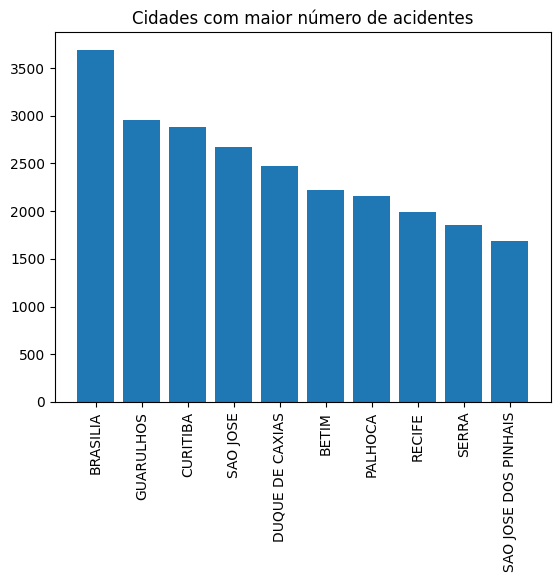

In [33]:
plt.title("Cidades com maior número de acidentes")
plt.xticks(rotation=90)

plt.bar(x = df_total.municipio.value_counts().keys()[0:10], height = df_total.municipio.value_counts()[0:10])

### Agrupamento por mês

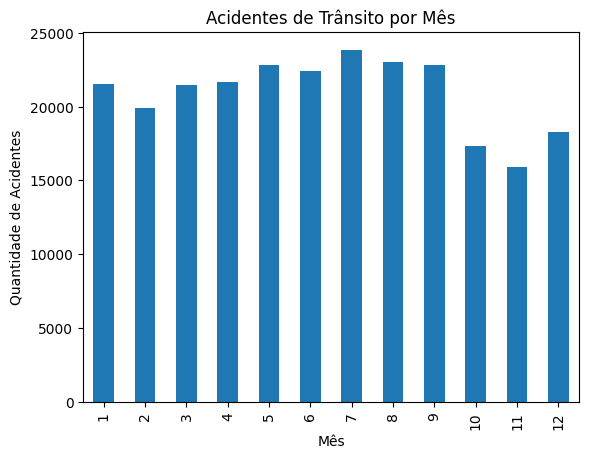

In [34]:
df_total['data_inversa'] = pd.to_datetime(df_total['data_inversa'], format='%Y-%m-%d')
df_total['mes'] = df_total['data_inversa'].dt.month
acidentes_por_mes = df_total.groupby('mes')['id'].count()
acidentes_por_mes.plot(kind='bar')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Acidentes')
plt.title('Acidentes de Trânsito por Mês')
plt.show()

### Acidentes por dia da semana

Text(0.5, 1.0, 'Distribuição de Acidentes por Dia da Semana')

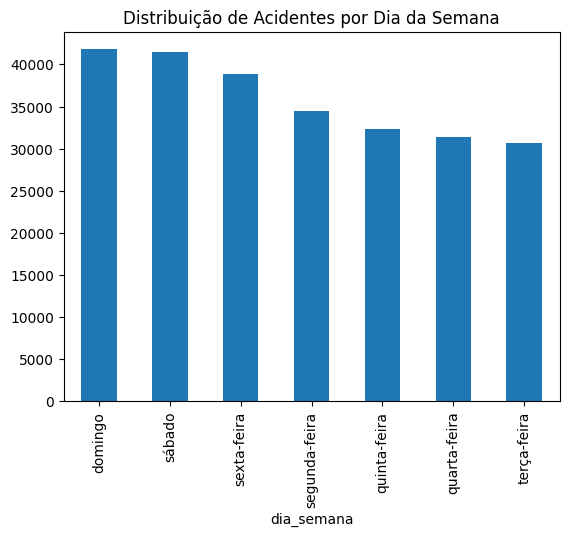

In [35]:
acidentes_por_dia = df_total['dia_semana'].value_counts()
acidentes_por_dia.plot(kind='bar')
plt.title('Distribuição de Acidentes por Dia da Semana')

### Distribuição por período do dia

Text(0.5, 1.0, 'Distribuição de Acidentes por período do dia')

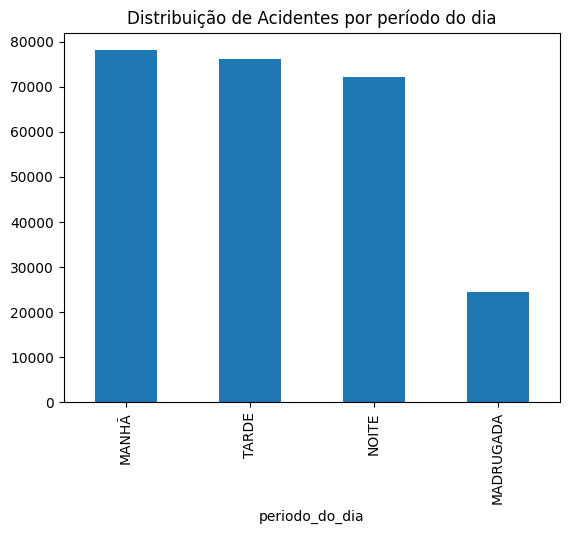

In [61]:
acidentes_por_dia = df_total['periodo_do_dia'].value_counts()
acidentes_por_dia.plot(kind='bar')
plt.title('Distribuição de Acidentes por período do dia')

### Distribução por hora do dia

Text(0.5, 1.0, 'Distribuição de Acidentes por Hora do Dia')

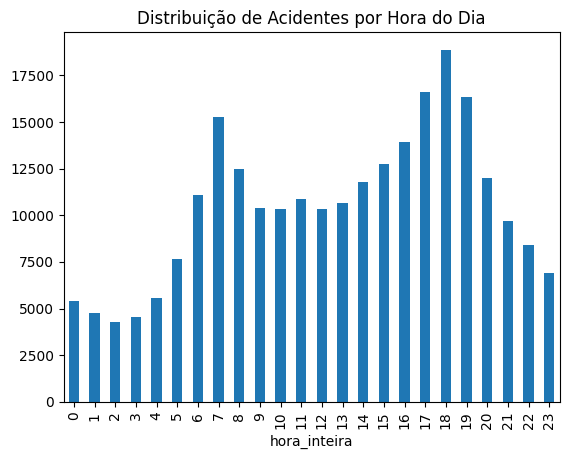

In [64]:
# df_total['horario'] = pd.to_datetime(df_total['horario'], format='%H:%M:%S')
# df_total['hora'] = df_total['horario'].dt.hour

acidentes_por_hora = df_total.groupby('hora_inteira')['id'].count()
acidentes_por_hora.plot(kind='bar')
plt.title('Distribuição de Acidentes por Hora do Dia')

### Participação de cada tipo de acidente no total

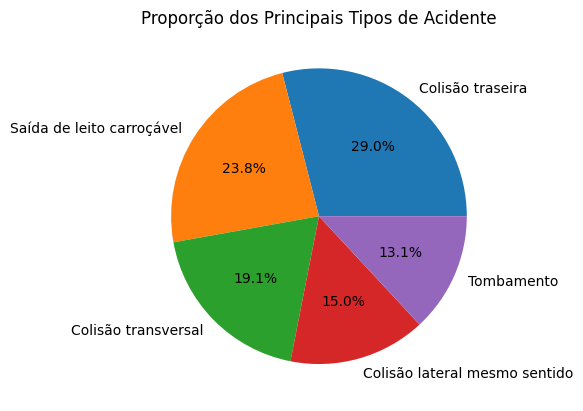

In [37]:
import matplotlib.pyplot as plt

tipo_counts = df_total['tipo_acidente'].value_counts()

# Se houver muitas categorias, você pode filtrar as principais
tipo_counts_top = tipo_counts.head(5)  # Top 5 tipos mais frequentes

plt.pie(tipo_counts_top, labels=tipo_counts_top.index, autopct='%1.1f%%')
plt.title('Proporção dos Principais Tipos de Acidente')
plt.show()

### Principais causas de acidentes no total

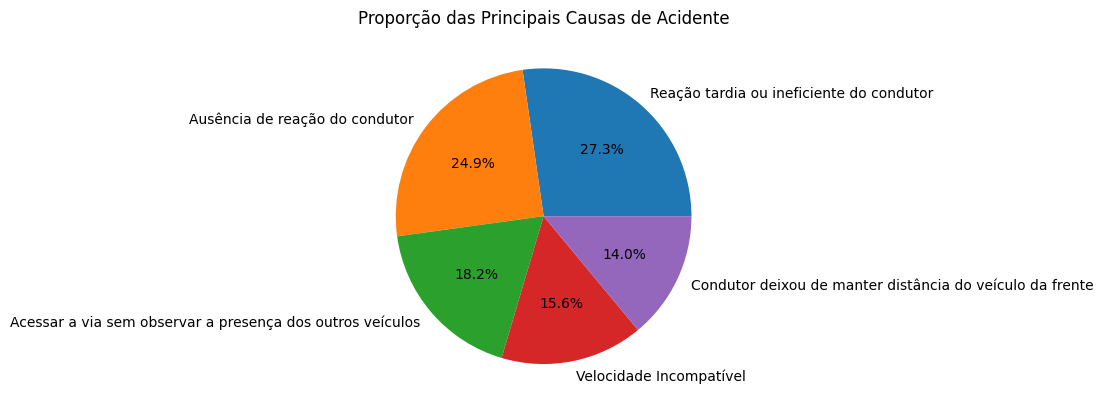

In [38]:
causa_counts = df_total['causa_acidente'].value_counts()
causa_counts_top = causa_counts.head(5)

plt.pie(causa_counts_top, labels=causa_counts_top.index, autopct='%1.1f%%')
plt.title('Proporção das Principais Causas de Acidente')
plt.show()

### Condição metereológica

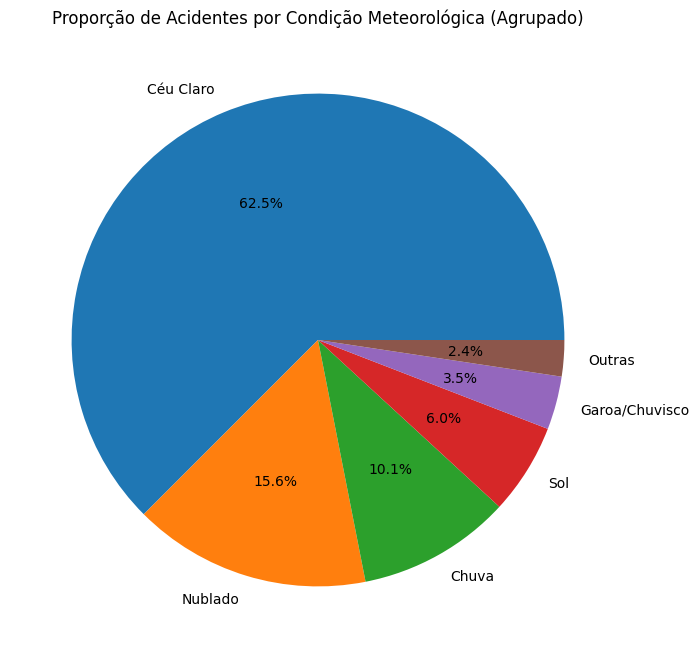

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que sua coluna é 'condicao_metereologica'
cond_counts = df_total['condicao_metereologica'].value_counts()

# Defina um limite mínimo de frequência (pode ser absoluto ou percentual)
limite = 5000  # Ex: só manter as categorias com mais de x ocorrências

# Crie uma função que devolve a categoria se for >= limite, senão devolve "Outras"
def agrupar_categorias(x):
    if cond_counts[x] >= limite:
        return x
    else:
        return "Outras"

# Crie uma nova coluna no DataFrame (opcional) ou só uma série
df_total['condicao_grouped'] = df_total['condicao_metereologica'].apply(agrupar_categorias)

# Agora conte novamente as ocorrências na coluna agrupada
cond_grouped_counts = df_total['condicao_grouped'].value_counts()

# Faça o gráfico de pizza
plt.figure(figsize=(8,8))
plt.pie(cond_grouped_counts, labels=cond_grouped_counts.index, autopct='%1.1f%%')
plt.title('Proporção de Acidentes por Condição Meteorológica (Agrupado)')
plt.show()

# Boxplot

### Feridos graves por dia da semana

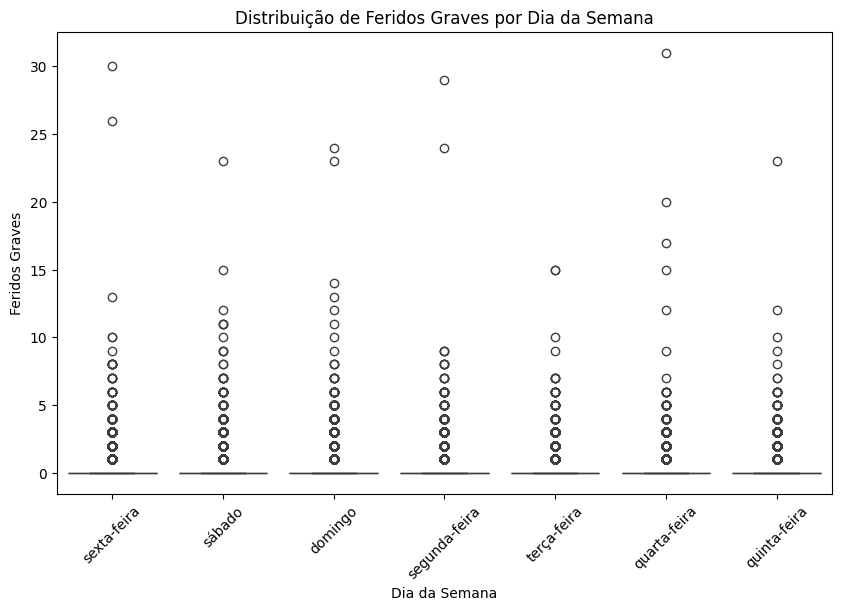

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo: Boxplot para mostrar a distribuição do número de feridos graves
# em cada dia da semana
plt.figure(figsize=(10, 6))

sns.boxplot(x='dia_semana', y='feridos_graves', data=df_total)

plt.title('Distribuição de Feridos Graves por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Feridos Graves')
plt.xticks(rotation=45)  # Rotaciona labels se necessário

plt.show()


### Veículos envolvidos por tipo de acidente

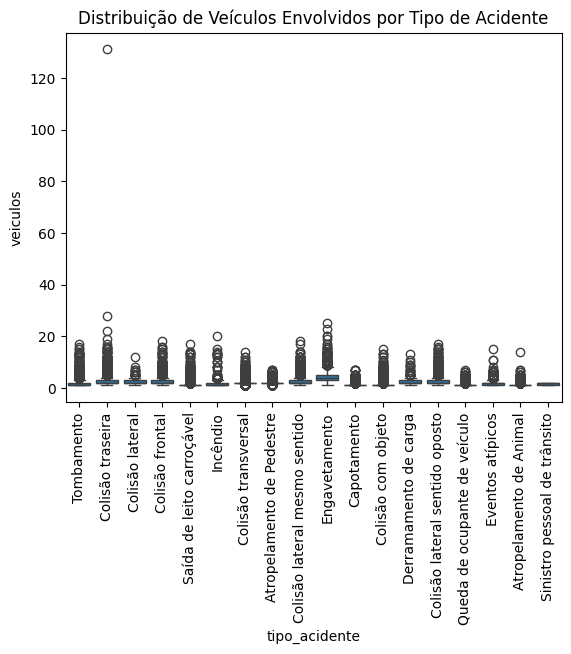

In [49]:
sns.boxplot(x='tipo_acidente', y='veiculos', data=df_total)
plt.title('Distribuição de Veículos Envolvidos por Tipo de Acidente')
plt.xticks(rotation=90)
plt.show()

### Pessoas por fase do dia

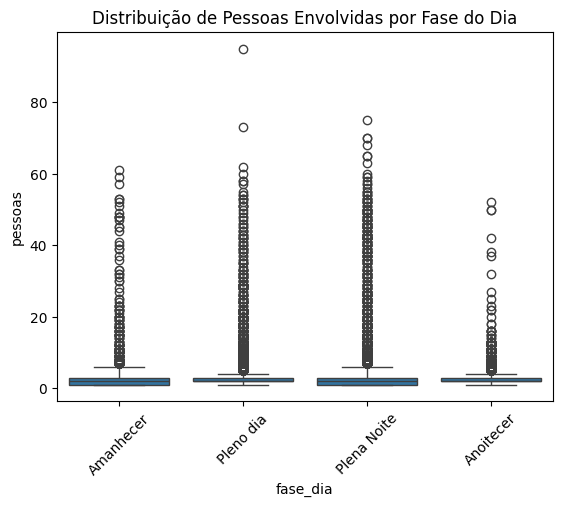

In [41]:
sns.boxplot(x='fase_dia', y='pessoas', data=df_total)
plt.title('Distribuição de Pessoas Envolvidas por Fase do Dia')
plt.xticks(rotation=45)
plt.show()

### Feridos por condição metereológica

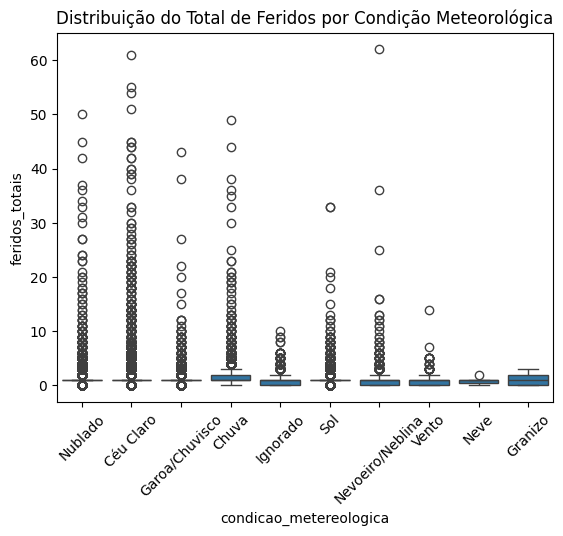

In [42]:
df_total['feridos_totais'] = df_total['feridos_leves'] + df_total['feridos_graves']
sns.boxplot(x='condicao_metereologica', y='feridos_totais', data=df_total)
plt.title('Distribuição do Total de Feridos por Condição Meteorológica')
plt.xticks(rotation=45)
plt.show()

### Mapa de calor

Text(0.5, 1.0, 'Matriz de Correlação entre Variáveis Numéricas')

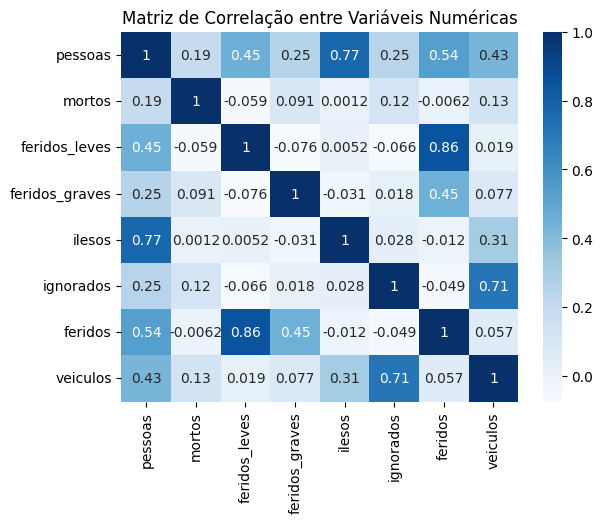

In [39]:
import seaborn as sns

numeric_cols = ['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos']
corr = df_total[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Matriz de Correlação entre Variáveis Numéricas')

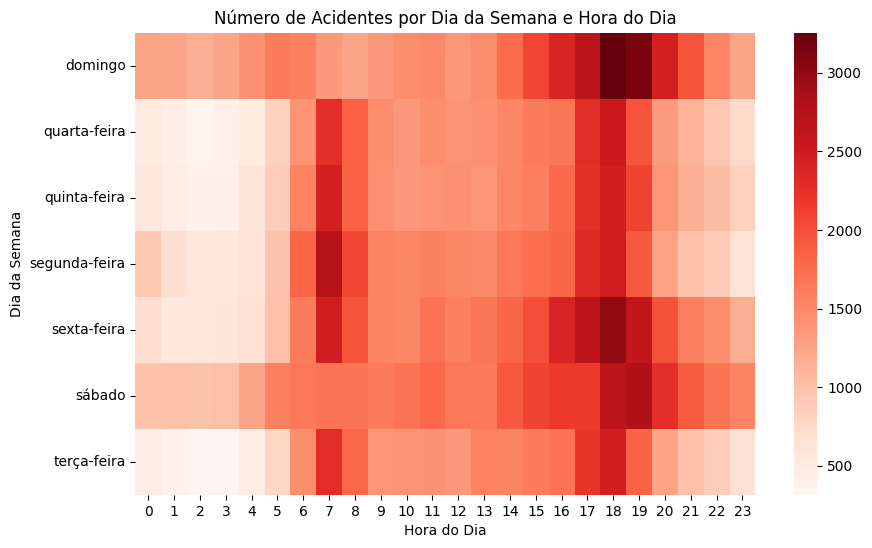

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Converter coluna de horário para hora (inteiro)
df_total['hora'] = pd.to_datetime(df_total['horario'], format='%H:%M:%S').dt.hour

# Tabela de frequência: dia_semana x hora
pivot_data = pd.crosstab(df_total['dia_semana'], df_total['hora'])

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='Reds', annot=False)
plt.title('Número de Acidentes por Dia da Semana e Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')
plt.show()

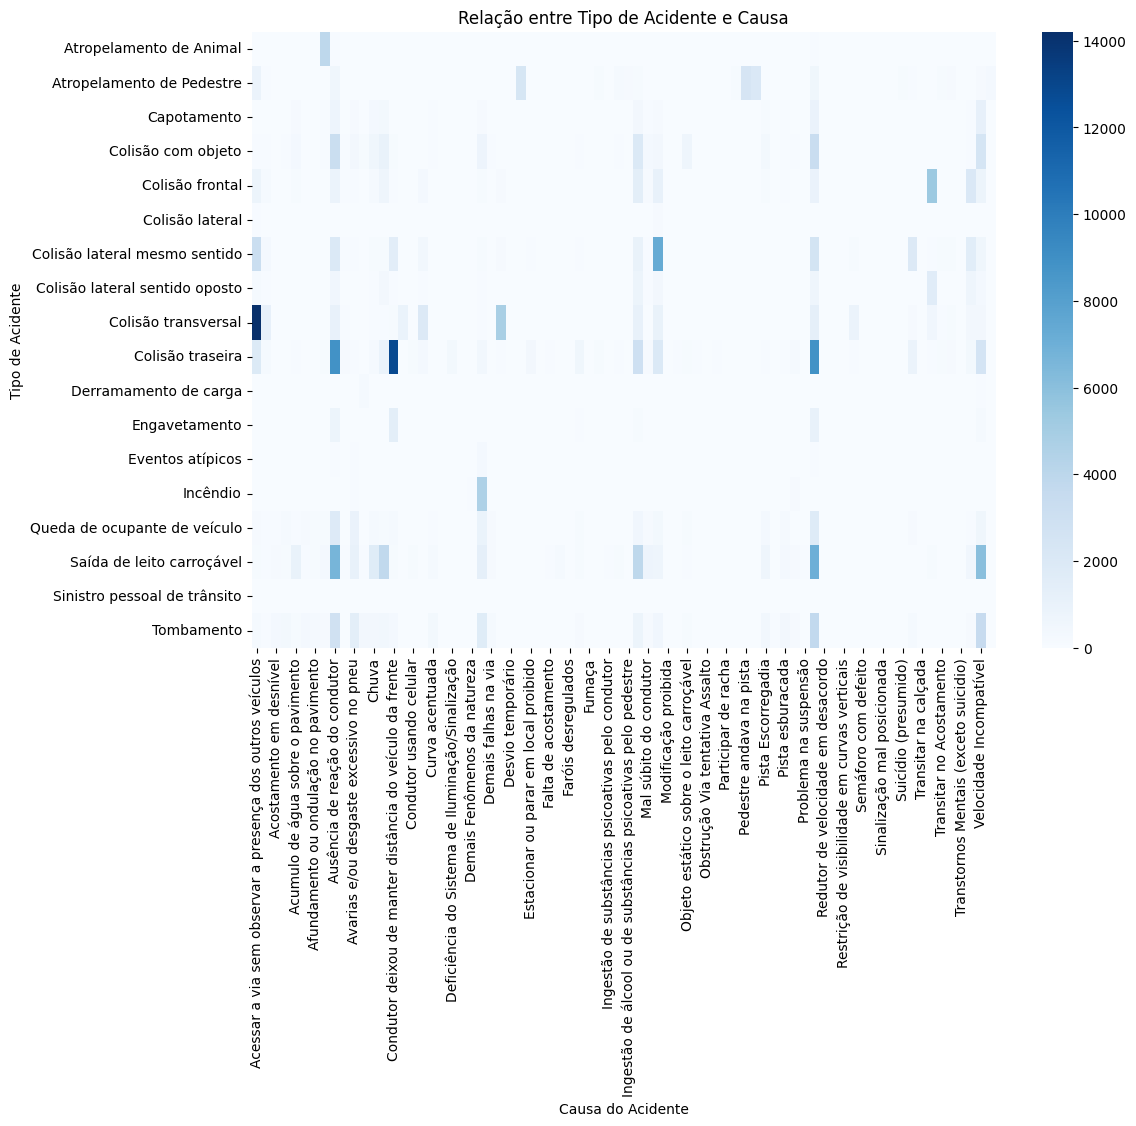

In [47]:
pivot_data = pd.crosstab(df_total['tipo_acidente'], df_total['causa_acidente'])

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='Blues', annot=False)
plt.title('Relação entre Tipo de Acidente e Causa')
plt.xlabel('Causa do Acidente')
plt.ylabel('Tipo de Acidente')
plt.xticks(rotation=90)
plt.show()

### Análise geográfica dos acidentes

/home/leticia/miniconda3/envs/trabalho_residentes/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


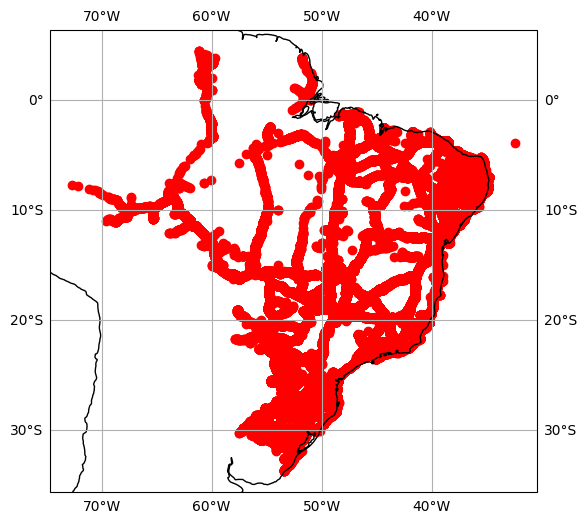

In [18]:
# Lista de coordenadas
lats = df_total.latitude  # latitude
lons = df_total.longitude # longitude

# Cria figura e Axes com projeção Cartopy (PlateCarree, p.ex.)
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Adiciona linhas costeiras para referência
ax.coastlines()

# Adiciona gridlines (opcional)
ax.gridlines(draw_labels=True)

# Plota pontos (longitude, latitude)
ax.scatter(lons, lats, color='red', transform=ccrs.PlateCarree())

plt.show()
